# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### My additional analysis
* There is no strong relationship between latitude and humidity. 84% of cities sampled have at least 60% humidity.
* Humidity and cloudiness are not necessarily proportionally related. Out of cities with at least 60% cloudy days, 11% had less than 60% average humidity.
* 67% of cities sampled had wind speeds of less than 10 miles per hour.

---



In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units=imperial&q="
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []

for x in range(len(cities)):
    try:
        print(f"Processing Record {x} | {cities[x]}")
        weather_response = requests.get(query_url + str(cities[x])).json()
        cloud.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind.append(weather_response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")

Processing Record 0 | coquimbo
Processing Record 1 | san patricio
Processing Record 2 | barentsburg
City not found. Skipping...
Processing Record 3 | skibbereen
Processing Record 4 | tasiilaq
Processing Record 5 | kodiak
Processing Record 6 | komsomolskiy
Processing Record 7 | hobart
Processing Record 8 | mataura
Processing Record 9 | arraial do cabo
Processing Record 10 | busselton
Processing Record 11 | biryukove
Processing Record 12 | lasa
Processing Record 13 | velke porici
Processing Record 14 | punta arenas
Processing Record 15 | zhezkazgan
Processing Record 16 | luderitz
Processing Record 17 | cape town
Processing Record 18 | taolanaro
City not found. Skipping...
Processing Record 19 | vaini
Processing Record 20 | lorengau
Processing Record 21 | ayan
Processing Record 22 | saint george
Processing Record 23 | toulepleu
City not found. Skipping...
Processing Record 24 | pompeu
Processing Record 25 | hermanus
Processing Record 26 | airai
Processing Record 27 | tarime
Processing Rec

City not found. Skipping...
Processing Record 231 | georgetown
Processing Record 232 | vanavara
Processing Record 233 | baker city
Processing Record 234 | pangnirtung
Processing Record 235 | broome
Processing Record 236 | puteyets
Processing Record 237 | bahia blanca
Processing Record 238 | gizo
Processing Record 239 | san quintin
Processing Record 240 | bardiyah
City not found. Skipping...
Processing Record 241 | avera
Processing Record 242 | guerrero negro
Processing Record 243 | emba
Processing Record 244 | valparaiso
Processing Record 245 | amahai
Processing Record 246 | corrente
Processing Record 247 | victoria
Processing Record 248 | zhanaozen
Processing Record 249 | khandbari
Processing Record 250 | itaituba
Processing Record 251 | buala
Processing Record 252 | srednekolymsk
Processing Record 253 | honningsvag
Processing Record 254 | grand island
Processing Record 255 | rungata
City not found. Skipping...
Processing Record 256 | dingle
Processing Record 257 | hambantota
Processi

Processing Record 459 | beloha
Processing Record 460 | birao
Processing Record 461 | kamenskoye
City not found. Skipping...
Processing Record 462 | basco
Processing Record 463 | lagoa
Processing Record 464 | bathsheba
Processing Record 465 | angoche
Processing Record 466 | algiers
Processing Record 467 | marsala
Processing Record 468 | vila franca do campo
Processing Record 469 | myrtle beach
Processing Record 470 | leshukonskoye
Processing Record 471 | shahabad
Processing Record 472 | myra
Processing Record 473 | leh
Processing Record 474 | slovenska bistrica
Processing Record 475 | conceicao do araguaia
Processing Record 476 | aconibe
Processing Record 477 | vostok
Processing Record 478 | nicolas bravo
Processing Record 479 | kousseri
City not found. Skipping...
Processing Record 480 | oistins
Processing Record 481 | camacha
Processing Record 482 | nizwa
Processing Record 483 | abu samrah
Processing Record 484 | codrington
Processing Record 485 | sambava
Processing Record 486 | ancud

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_df = pd.DataFrame(list(zip(cities, cloud, country, date, humidity, lat, lon, max_temp, wind)),
                          columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,coquimbo,75,CL,1538082000,87,-29.95,-71.34,55.40,8.05
1,san patricio,32,PY,1538086065,81,-26.98,-56.83,74.83,3.49
2,barentsburg,75,IE,1538085600,87,51.55,-9.27,51.80,18.34
3,skibbereen,92,GL,1538085000,100,65.61,-37.64,32.00,21.92
4,tasiilaq,1,US,1538085180,33,39.95,-94.76,75.92,10.29


In [34]:
weather_df.to_csv('WeatherPy_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

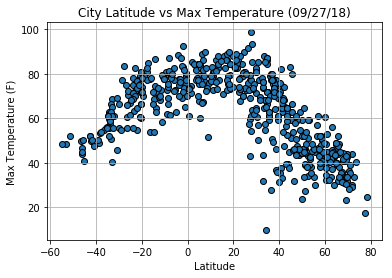

In [55]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o', edgecolor='black')
plt.title('City Latitude vs Max Temperature (09/27/18)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('City Latitude vs Max Temperature.png')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

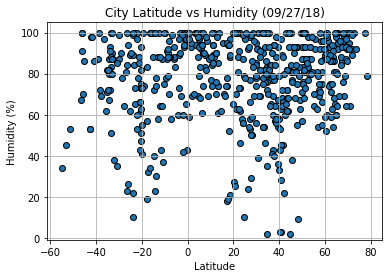

In [56]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', edgecolor='black')
plt.ylim(-1, 105)
plt.title('City Latitude vs Humidity (09/27/18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('City Latitude vs Humidity.png')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

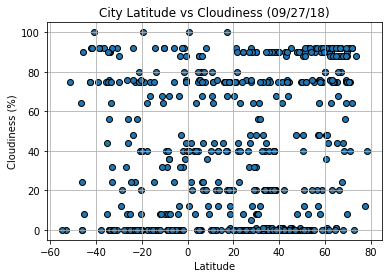

In [57]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', edgecolor='black')
plt.title('City Latitude vs Cloudiness (09/27/18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('City Latitude vs Cloudiness.png')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

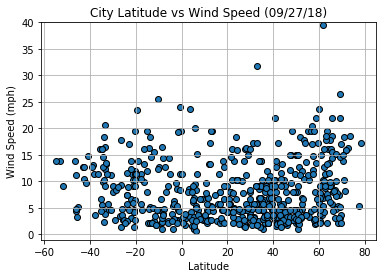

In [58]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', edgecolor='black')
plt.ylim(-1,40)
plt.title('City Latitude vs Wind Speed (09/27/18)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('City Latitude vs Wind Speed.png')
plt.show